In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [2]:
data = pd.read_csv("fb.csv")

In [3]:
data.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [4]:
data.describe()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,9.900300e+04,99003.000000,99003.000000,99003.000000,99003.000000,99001.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000
mean,1.597045e+06,37.280224,14.530408,1975.719776,6.283365,537.887375,196.350787,107.452471,156.078785,142.689363,106.116300,84.120491,49.962425,58.568831
std,3.440592e+05,22.589748,9.015606,22.589748,3.529672,457.649874,387.304229,188.786951,572.280681,1387.919613,445.252985,839.889444,285.560152,601.416348
min,1.000008e+06,13.000000,1.000000,1900.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.298806e+06,20.000000,7.000000,1963.000000,3.000000,226.000000,31.000000,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.596148e+06,28.000000,14.000000,1985.000000,6.000000,412.000000,82.000000,46.000000,11.000000,8.000000,4.000000,4.000000,0.000000,2.000000
75%,1.895744e+06,50.000000,22.000000,1993.000000,9.000000,675.000000,206.000000,117.000000,81.000000,59.000000,46.000000,33.000000,7.000000,20.000000
max,2.193542e+06,113.000000,31.000000,2000.000000,12.000000,3139.000000,4923.000000,4144.000000,25111.000000,261197.000000,25111.000000,138561.000000,14865.000000,129953.000000


Dropping mobile likes and computer likes as tehre total is already present

In [6]:
del data['mobile_likes'] 

In [8]:
del data['mobile_likes_received'] 

In [9]:
del data['www_likes'] 

In [10]:
del data['www_likes_received'] 

In [11]:
data.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0


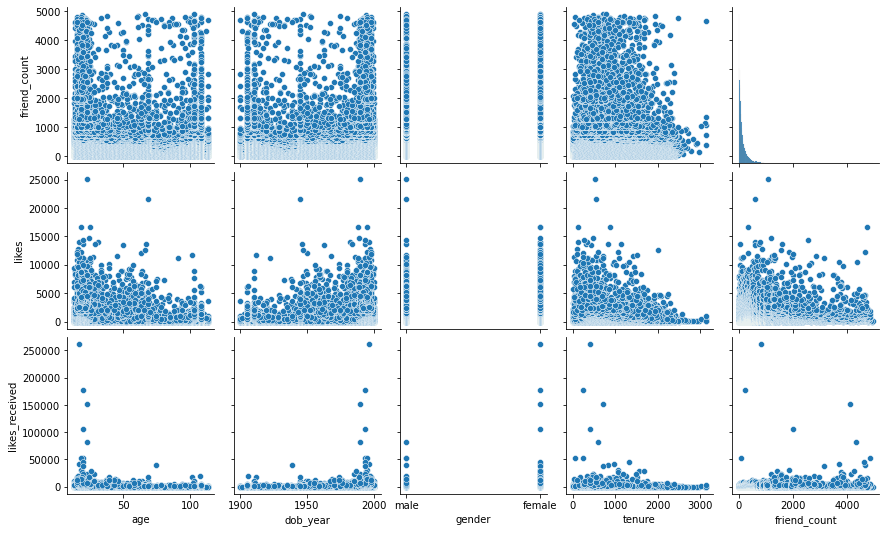

In [19]:
sns.pairplot(
    data,
    x_vars=["age", "dob_year", "gender","tenure","friend_count"],
    y_vars=["friend_count", "likes","likes_received"],
)


In [21]:
data.corr()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received
userid,1.000000,-0.007265,-0.000839,0.007265,0.002924,-0.003446,-0.001314,-0.001591,-0.002875,0.001526
age,-0.007265,1.000000,0.035035,-1.000000,0.025167,0.462742,-0.027407,-0.058059,-0.013009,-0.022570
dob_day,-0.000839,0.035035,1.000000,-0.035035,0.129443,0.041855,0.021961,0.022999,0.015980,0.001367
dob_year,0.007265,-1.000000,-0.035035,1.000000,-0.025167,-0.462742,0.027407,0.058059,0.013009,0.022570
dob_month,0.002924,0.025167,0.129443,-0.025167,1.000000,0.029446,0.019804,0.020075,0.014147,0.006495
tenure,-0.003446,0.462742,0.041855,-0.462742,0.029446,1.000000,0.166256,0.133505,0.057132,0.027745
friend_count,-0.001314,-0.027407,0.021961,0.027407,0.019804,0.166256,1.000000,0.825850,0.298017,0.236463
friendships_initiated,-0.001591,-0.058059,0.022999,0.058059,0.020075,0.133505,0.825850,1.000000,0.285592,0.175131
likes,-0.002875,-0.013009,0.015980,0.013009,0.014147,0.057132,0.298017,0.285592,1.000000,0.327376
likes_received,0.001526,-0.022570,0.001367,0.022570,0.006495,0.027745,0.236463,0.175131,0.327376,1.000000


In [22]:
data.isnull().sum()

userid                     0
age                        0
dob_day                    0
dob_year                   0
dob_month                  0
gender                   175
tenure                     2
friend_count               0
friendships_initiated      0
likes                      0
likes_received             0
dtype: int64

In [23]:
data.dropna(how = 'any', inplace = True)

In [24]:
data.isnull().sum()

userid                   0
age                      0
dob_day                  0
dob_year                 0
dob_month                0
gender                   0
tenure                   0
friend_count             0
friendships_initiated    0
likes                    0
likes_received           0
dtype: int64

In [26]:
data.dtypes

userid                     int64
age                        int64
dob_day                    int64
dob_year                   int64
dob_month                  int64
gender                    object
tenure                   float64
friend_count               int64
friendships_initiated      int64
likes                      int64
likes_received             int64
dtype: object

In [29]:
 data['tenure'] = data['tenure'].astype('int')

# Adding Age Group label

In [30]:
lables = ['10-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100','101-110','111-120']
data['age_group'] = pd.cut(data['age'], bins = np.arange(10, 121, 10), labels = lables, right=True)
data.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,age_group
0,2094382,14,19,1999,11,male,266,0,0,0,0,10-20
1,1192601,14,2,1999,11,female,6,0,0,0,0,10-20
2,2083884,14,16,1999,11,male,13,0,0,0,0,10-20
3,1203168,14,25,1999,12,female,93,0,0,0,0,10-20
4,1733186,14,4,1999,12,male,82,0,0,0,0,10-20


Age Group Analysis

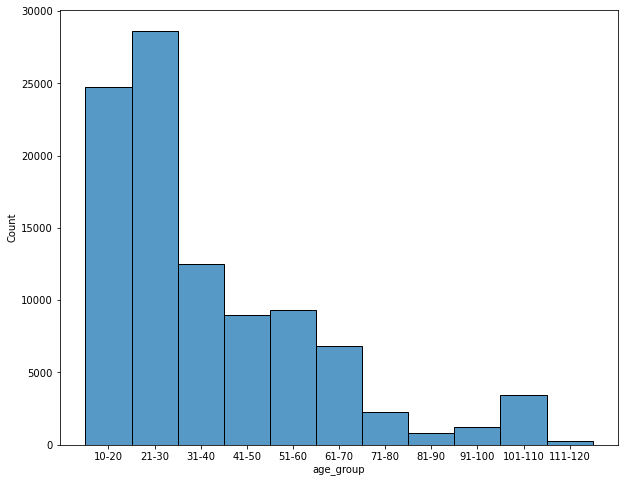

In [41]:
plt.subplots(figsize = (10,8))
sns.histplot(data, x = 'age_group')
plt.show()


Gender-wise Analysis

In [38]:
gender_counts = data['gender'].value_counts()

In [39]:
gender_counts

male      58574
female    40252
Name: gender, dtype: int64

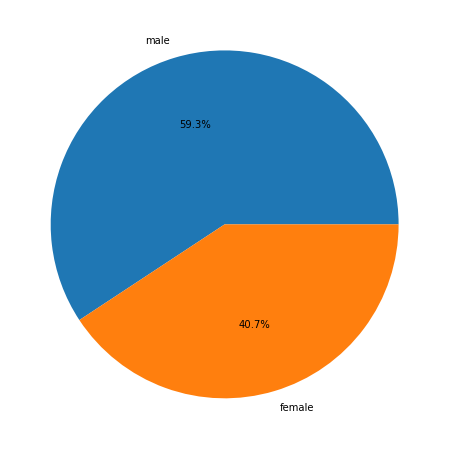

In [46]:

plt.subplots(figsize=(10,8))
plt.pie(gender_counts, labels = ['male','female'], autopct='%1.1f%%')
plt.show()

Gender vs Like count

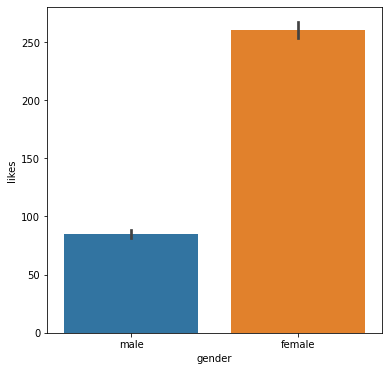

In [50]:
plt.subplots(figsize = (6,6))
sns.barplot(data = data,x = 'gender',y = 'likes')
plt.show()

We saw that the counts of male user is more than the female users but as per like barplot , we can see that females likes more and are hence more active than male.


Likes Recieved vs Gender

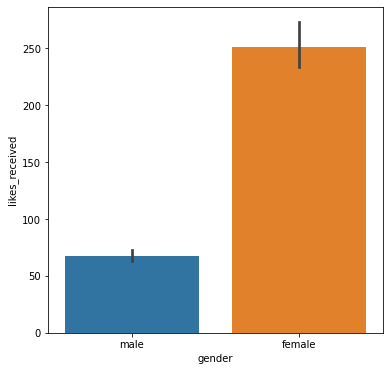

In [52]:
plt.subplots(figsize=(6,6))
sns.barplot(data = data,x='gender',y='likes_received')
plt.show()

The fact is evident here that female content is more liked on the platform

Likes Received vs Age Group

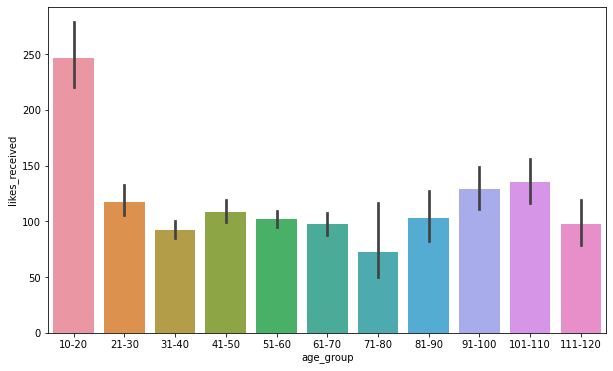

In [56]:
plt.subplots(figsize=(10,6))
sns.barplot(data = data,y='likes_received',x='age_group')
plt.show()

As we can see that agr group between 10-20 or the teenage group recieves the most likes.

Likes given vs Age Group

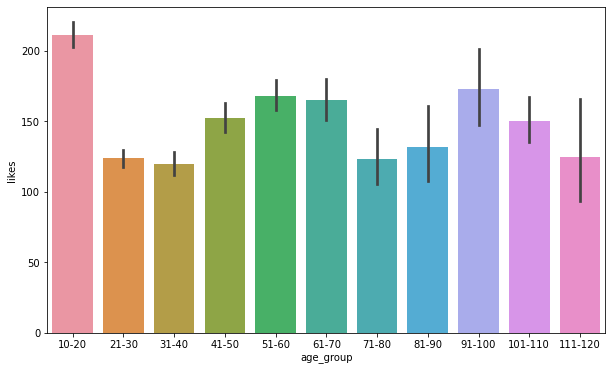

In [58]:
plt.subplots(figsize=(10,6))
sns.barplot(data = data,x='age_group',y='likes')
plt.show()

Again we can see that the teenage group is the most active

# Friendship Analysis

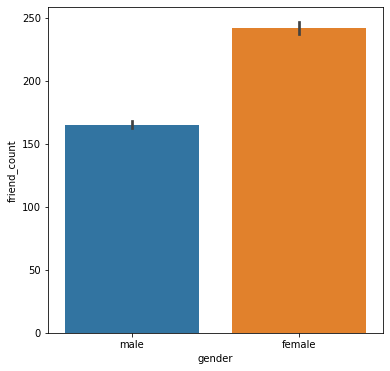

In [60]:
plt.subplots(figsize=(6,6))
sns.barplot(data = data,x='gender',y='friend_count')
plt.show()

Females have more friends

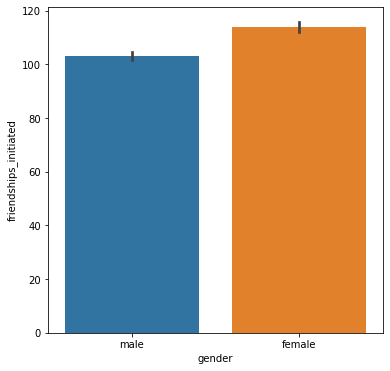

In [61]:
plt.subplots(figsize=(6,6))
sns.barplot(data=data,x="gender",y="friendships_initiated")
plt.show()

This is almost equal but still female sends more request

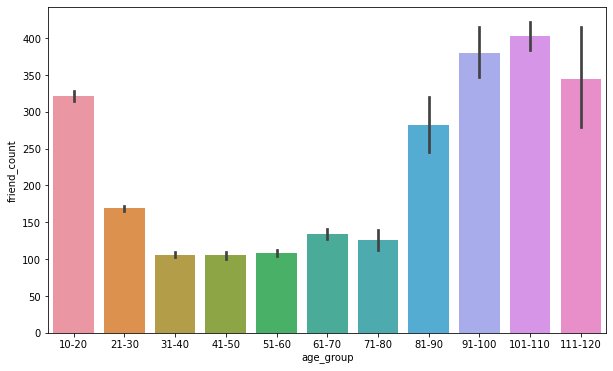

In [63]:
plt.subplots(figsize=(10,6))
sns.barplot(data=data,x="age_group",y="friend_count")
plt.show()

Here is a interesting insight that age group of 101-110 has the most friends contrary to the fact that are actually less active than teenagers

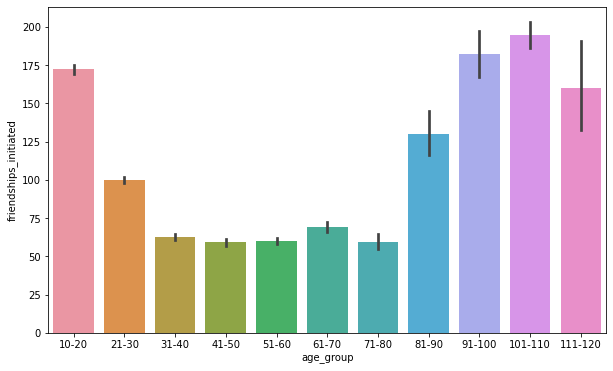

In [64]:
plt.subplots(figsize=(10,6))
sns.barplot(data=data,x='age_group',y='friendships_initiated')
plt.show()

I think this is the reason , age group 101-110 has the most friends because they send the most friend request.

# Tenure Analysis

We will se activeness of user and friends of users vs their tenure on the social medai

In [65]:
lables = ['0-1 year','1-2 years','2-3 years','3-4 years','4-5 years','5-6 years','6-7 years','7-8 years','8-9 years']
data['year_group'] = pd.cut(data['tenure'], bins = np.arange(-1, 3285 + 1, 365), labels =lables)
data.head()


,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,age_group,year_group
0,2094382,14,19,1999,11,male,266,0,0,0,0,10-20,0-1 year
1,1192601,14,2,1999,11,female,6,0,0,0,0,10-20,0-1 year
2,2083884,14,16,1999,11,male,13,0,0,0,0,10-20,0-1 year
3,1203168,14,25,1999,12,female,93,0,0,0,0,10-20,0-1 year
4,1733186,14,4,1999,12,male,82,0,0,0,0,10-20,0-1 year


Like Given vs Tenure

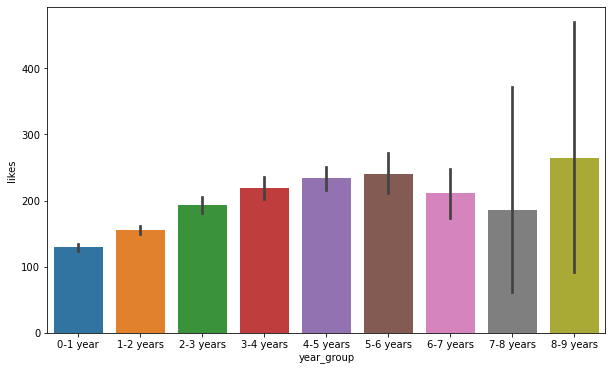

In [68]:
plt.subplots(figsize=(10,6))
sns.barplot(data=data,x='year_group',y='likes')
plt.show()

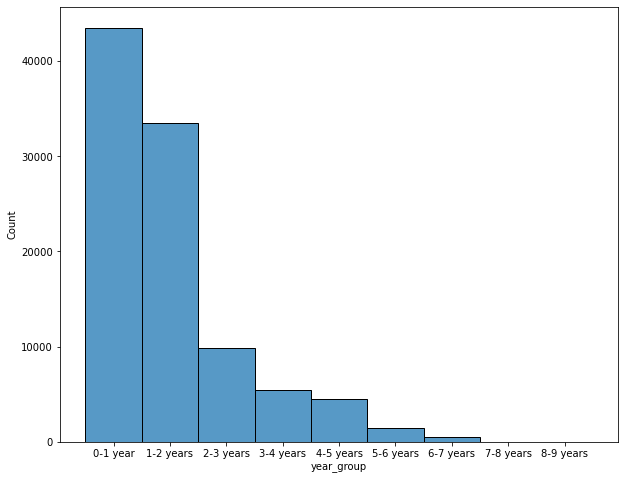

In [75]:
plt.subplots(figsize = (10,8))
sns.histplot(data = data,x = 'year_group')
plt.show()

From above plot we can see that; majority of user remain on platform or app for around 0 –1 year after which user count drops by 10 % followed by much steeper decrease in user count. Also, we can see that after 5 years on platform most all users stop using platform and look for alternative.